In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as sps
from sympy import *
from matplotlib import cm
plt.style.use('ggplot')
%matplotlib inline

def scan_from_csv(filename,header=None):
    if not header:
        return pd.read_csv(filename,na_values='None')
    else:
        return pd.read_csv(filename,na_values='None',header=-1)

def write_answer_to_file(answer,file):
    with open(file, 'w') as answer_file:  
        answer_file.write(answer)

Даны две независимые выборки $X,Y$ из распределения $t_{10}$. Попробуем для них воспользоваться критерием Стьюдента для проверки однородности нормальных независимых выборок. 

Критерий можно применять для проверки гипотезы однородности данных выборок так как в случае верности гипотезы распределение статистики не зависит от выборки. Значит достаточно найти нужные квантили. 

Возьмем квантили, которые дают нужный уровень значимости для нормального распределения и посмотрим насколько они отличаются от реального уровня доверия.

Будем рассматривать $\alpha \in \{0.01,0.05,0.1\}$

In [99]:
def calc_T(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    m = len(Y)
    S2tot = (n * np.var(X) + m * np.var(Y)) / (n + m - 2)
    return (n * m / (n + m)) ** 0.5 * (np.mean(X - Y) / S2tot**0.5)

def draw(alpha,ns, amount):
    for i in range(len(alphas)):
        res = [amount[i][j][1]/(amount[i][j][0] + amount[i][j][1]) for j in range(len(ns))]
        plt.figure(figsize=(10,5))
        plt.title(r'$\alpha = $' + str(alphas[i]))
        plt.plot(ns, res,color='blue')
        plt.plot([ns[0],ns[-1]],[alphas[i],alphas[i]],color='red')
        plt.xlabel('N')
        plt.show()
        
def get_quant(alhas, ns):
    quant = np.zeros((len(alphas),len(ns)))  # two-tailed p-values 
    for i in range(len(alphas)):
        for j in range(len(ns)):
            quant[i][j] = sps.t.ppf(q = 1 - alphas[i] / 2,df = 2*ns[j]-2)
    return quant


def model(alphas, ns, quant, R):
    amount = np.zeros((len(alphas),len(ns),2))
    for i in range(len(alphas)):
        for j in range(len(ns)):
            for k in range(R):
                X,Y = sps.t.rvs(size=ns[j],df=10),sps.t.rvs(size=ns[j],df=10)
                stat = calc_T(X,Y)
                if abs(stat) > quant[i][j]:
                    amount[i][j][1] += 1
                else:
                    amount[i][j][0] += 1     
    return amount

In [100]:
def run(alphas, ns,R=1000):
    quant = get_quant(alphas, ns)
    amount = model(alphas, ns, quant,R)
    draw(alphas, ns, amount)
    return quant, amount

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


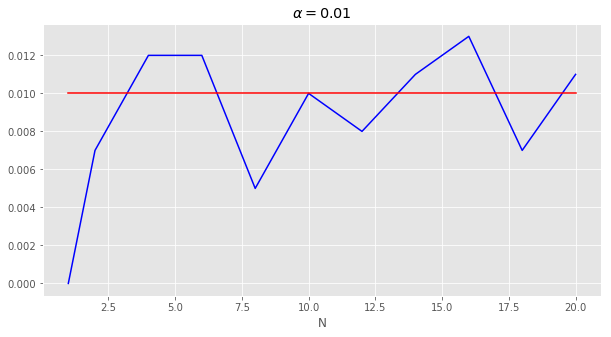

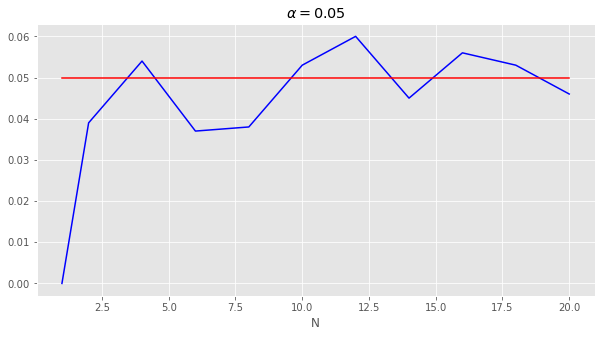

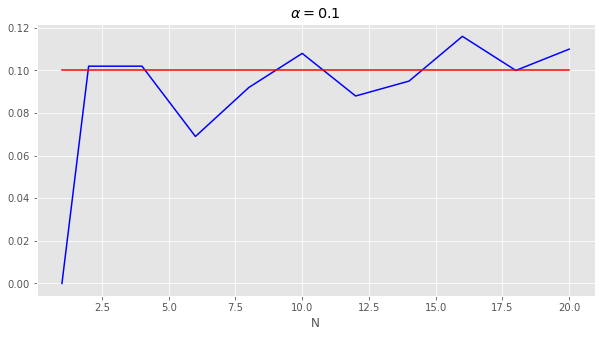

CPU times: user 7.89 s, sys: 179 ms, total: 8.07 s
Wall time: 8.48 s


In [101]:
%%time
alphas = [0.01, 0.05, 0.1]
ns = [1,2,4,6,8,10,12,14,16,18,20]
run(alphas,ns)

как видно при n ~ 10 критерий работает, посмотрим на бОльшие n:

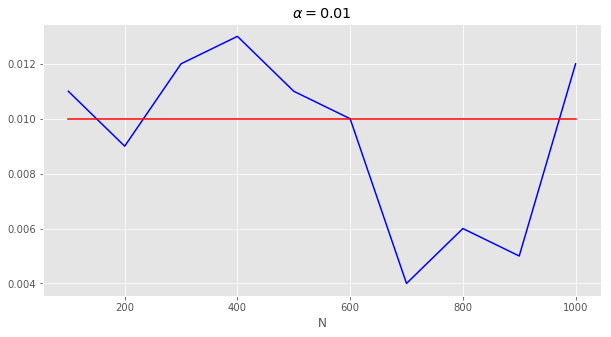

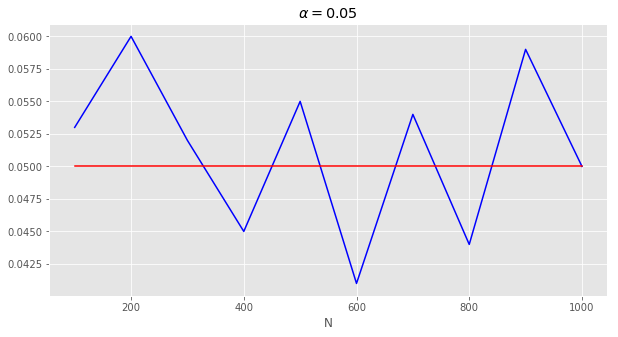

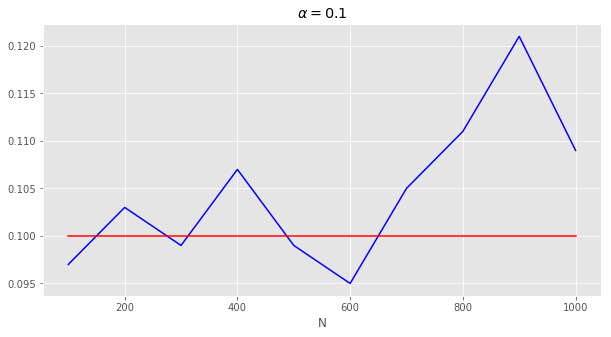

CPU times: user 11 s, sys: 108 ms, total: 11.1 s
Wall time: 11.2 s


In [93]:
%%time
alphas = [0.01, 0.05, 0.1]
ns = np.arange(100,1100,100)
run(alphas,ns,1000)

как видно уровень доверия полученный моделированием для $t_{10}$ не сильно отличается от заявленного уровня доверия для нормального распределения. Теоритически это следует из того, что предел распределений Стьюдента при $d \rightarrow \infty$ это нормальное(и видимо уже не сильно отличается при d=10 как в условии).